In [183]:
import tensorflow as tf

In [184]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist

In [257]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train: ", x_train.shape)

x_train:  (50000, 32, 32, 3)


In [258]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

In [259]:
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

In [260]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [261]:
std=1e-6
H=200
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [262]:
m=Ntr
iterations =300
lr =0.01
lr_decay=0.99
global reg
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

In [263]:
def MSE(y_true,y_pred,w,v,m):
    return((1/m)*np.sum(np.square(y_pred-y_true))+reg*(np.sum(w*w)+np.sum(v*v)))

In [264]:
def zigmoid(y):
    return(1.0/(1.0 + np.exp(-y)))
def forward(x,w,b,v,c):
    h=np.matmul(x,w)+b
    ac=zigmoid(h)
    return(np.matmul(ac,v)+c,ac)

In [265]:
def GD(w1,b1,w2,b2,lr,x,y,y_pred,hid,m):
    dy = 1./m*2.0*(y_pred -y) # partial derivative of L w.r.t y_pred
    transpose_hid=np.transpose(hid)
    transpose_w2=np.transpose(w2)
    transpose_x=np.transpose(x)
    dw2 = np.matmul(transpose_hid,dy) + reg*w2 # partial derivative of L w.r.t w2
    db2 = dy.sum(axis =0)# partial derivative of L w.r.t b2
    dhid = np.matmul(dy,transpose_w2) # partial derivative of L w.r.t hidden_layer
    dw1 = np.matmul(transpose_x,dhid*hid*(1-hid)) + reg*w1 # partial derivative of L w.r.t w1
    db1 = (dhid*hid*(1-hid)).sum(axis =0) # partial derivative of L w.r.t w1
    w1 =w1-lr*dw1
    w2 =w2-lr*dw2
    b1 =b1-lr*db1
    b2 =b2-lr*db2
    return(w1,b1,w2,b2)

In [266]:

for t in range(300):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    y_pred,h = forward(x,w1,b1,w2,b2)
    loss=MSE(y,y_pred,w1,w2,Ntr)
    loss_history.append(loss)
    a=np.sum((np.argmax(y_pred,axis=1)==np.argmax(y,axis=1)))
    acc=(a/Ntr)*100
    y_pred_test,h_test= forward(x_test,w1,b1,w2,b2)
    loss_test=MSE(y_test,y_pred_test,w1,w2,Nte)
    a_test=np.sum((np.argmax(y_pred_test,axis=1)==np.argmax(y_test,axis=1)))
    acc_test=(a_test/Nte)*100
    if (t%10==0):
        print( "Itr",t,"| Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc_test,"%")
    elif (t==299):
        print( "Last itr Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc_test,"%")
    train_acc_history.append(acc)
    val_acc_history.append(acc_test)
    w1,b1,w2,b2=GD(w1,b1,w2,b2,lr,x,y,y_pred,h,Ntr)
    lr *= lr_decay

Itr 0 | Lr = 0.01 | Loss train= 0.9999995478530203 | Acc train = 10.008000000000001 % | Loss test= 0.9999996135423175 | Acc test = 10.0 %
Itr 10 | Lr = 0.009043820750088045 | Loss train= 0.8829592431860795 | Acc train = 15.75 % | Loss test= 0.8830119277489518 | Acc test = 16.09 %
Itr 20 | Lr = 0.008179069375972308 | Loss train= 0.8543363918467956 | Acc train = 21.548000000000002 % | Loss test= 0.8545518832986542 | Acc test = 21.560000000000002 %
Itr 30 | Lr = 0.007397003733882804 | Loss train= 0.8401456297256126 | Acc train = 27.900000000000002 % | Loss test= 0.8391296499604077 | Acc test = 28.28 %
Itr 40 | Lr = 0.006689717585696805 | Loss train= 0.8325776505485858 | Acc train = 29.938 % | Loss test= 0.8318169275140366 | Acc test = 29.98 %
Itr 50 | Lr = 0.0060500606713753645 | Loss train= 0.8248083786948727 | Acc train = 32.31 % | Loss test= 0.8253330612718582 | Acc test = 31.89 %
Itr 60 | Lr = 0.005471566423907611 | Loss train= 0.8194856172857818 | Acc train = 33.948 % | Loss test= 0.

Text(0.5, 1.0, 'Training Loss')

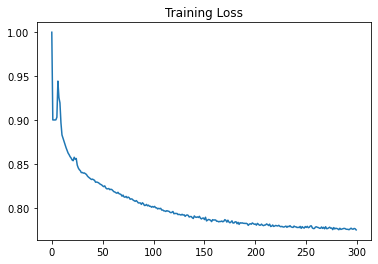

In [267]:
plt.plot(loss_history)
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

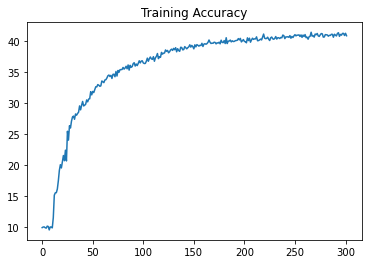

In [199]:
plt.plot(train_acc_history)
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Test Accuracy')

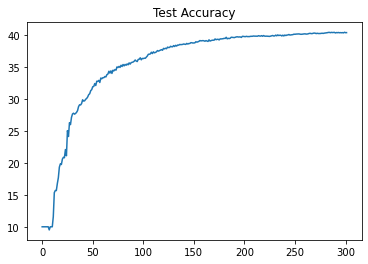

In [200]:
plt.plot(val_acc_history)
plt.title("Test Accuracy")

In [238]:
x1 = std*np.random.randn(Din, H)
x2 = std*np.random.randn(H,K)
z1 = np.zeros(H)
z2 = np.zeros(K)
print("x1:", x1.shape)
print("z1:", z1.shape)
print("x2:", x2.shape)
print("z2:", z2.shape)

x1: (3072, 200)
z1: (200,)
x2: (200, 10)
z2: (10,)


In [239]:
m=500
lr=0.017
lr_decay=0.999
loss_history_sgd = []
train_acc_history_sgd = []
val_acc_history_sgd = []

In [240]:
for t in range(300):
 batch_indices = np.random.choice(Ntr, batch_size)
 x_all= x_train[batch_indices]
 y_all= y_train[batch_indices]
 for i in range (int(Ntr/m)):
    x=x_all[m*i:m*(i+1)-1]
    y=y_all[m*i:m*(i+1)-1]
    y_pred,h = forward(x,x1,z1,x2,z2)
    loss=MSE(y,y_pred,x1,x2,m)
    loss_history_sgd.append(loss)
    a=np.sum((np.argmax(y_pred,axis=1)==np.argmax(y,axis=1)))
    acc=(a/m)*100
    train_acc_history_sgd.append(acc)
    y_pred_test,h_test= forward(x_test,x1,z1,x2,z2)
    loss_test=MSE(y_test,y_pred_test,x1,x2,Nte)
    a_test=np.sum((np.argmax(y_pred_test,axis=1)==np.argmax(y_test,axis=1)))
    acc_test=(a_test/Nte)*100
    val_acc_history_sgd.append(acc_test)
    x1,z1,x2,z2=GD(x1,z1,x2,z2,lr,x,y,y_pred,h,m)
    lr *= lr_decay
  
 if (t%10==0):
        print( "Itr",t,"| Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc_test,"%")
 elif (t==299):
        print( "Last itr Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc_test,"%")

<ipython-input-192-4e95e7728751>:2: RuntimeWarning: overflow encountered in exp
  return(1.0/(1.0 + np.exp(-y)))


Itr 0 | Lr = 0.015381466500933045 | Loss train= 0.8324366805960798 | Acc train = 28.4 % | Loss test= 0.8368486707764592 | Acc test = 30.14 %
Itr 10 | Lr = 0.005655694858660927 | Loss train= 0.7532238675553584 | Acc train = 44.800000000000004 % | Loss test= 0.7773486461632025 | Acc test = 41.25 %
Itr 20 | Lr = 0.002079573123430284 | Loss train= 0.7159666978416129 | Acc train = 51.6 % | Loss test= 0.7708763415812746 | Acc test = 42.26 %
Itr 30 | Lr = 0.0007646495229619789 | Loss train= 0.7047030779319885 | Acc train = 50.8 % | Loss test= 0.7711238588155875 | Acc test = 41.99 %
Itr 40 | Lr = 0.00028115813114641935 | Loss train= 0.7173274665634872 | Acc train = 51.4 % | Loss test= 0.770782525294567 | Acc test = 42.01 %
Itr 50 | Lr = 0.00010338055845969314 | Loss train= 0.7130633137409154 | Acc train = 49.2 % | Loss test= 0.7707267713426768 | Acc test = 42.05 %
Itr 60 | Lr = 3.801255835589629e-05 | Loss train= 0.6913096917896749 | Acc train = 55.00000000000001 % | Loss test= 0.7707948108397

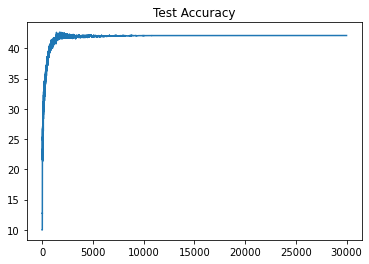

In [254]:
plt.plot(val_acc_history_sgd)
plt.title("Test Accuracy")
plt.show()

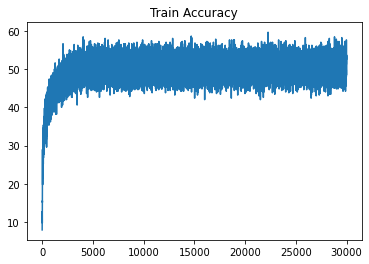

In [255]:
plt.plot(train_acc_history_sgd)
plt.title("Train Accuracy")
plt.show()

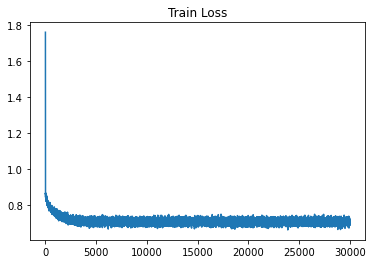

In [274]:
plt.plot(loss_history_sgd[15:])
plt.title("Train Loss")
plt.show()

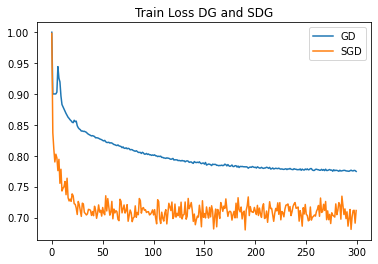

In [283]:

plt.plot(loss_history, label='GD')
plt.plot(loss_history_sgd[0:300*1000:100], label='SGD')
plt.title("Train Loss DG and SDG")
plt.legend()
plt.show()

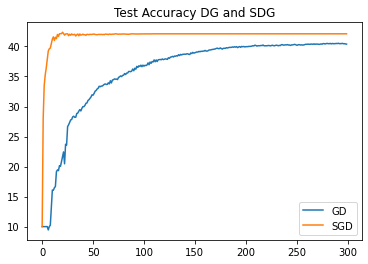

In [284]:
plt.plot(val_acc_history, label='GD')
plt.plot(val_acc_history_sgd[0:300*1000:100], label='SGD')
plt.title("Test Accuracy DG and SDG")
plt.legend()
plt.show()

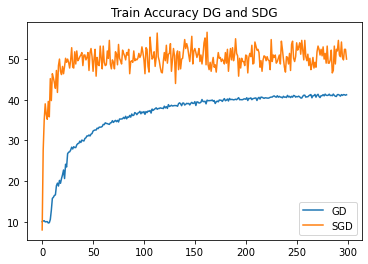

In [285]:
plt.plot(train_acc_history, label='GD')
plt.plot(train_acc_history_sgd[0:300*1000:100], label='SGD')
plt.title("Train Accuracy DG and SDG")
plt.legend()
plt.show()